# 2021 Federal Election 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ELECTION/P00000001-ALL.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001726,C00500587,P20003281,"Perry, Rick","GORMAN, CHRIS D. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,5000.0,29-SEP-11,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,NaN,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,SA17A,751678
1001727,C00500587,P20003281,"Perry, Rick","DUFFY, DAVID A. MR.",INFO REQUESTED,XX,99999,DUFFY EQUIPMENT COMPANY INC.,BUSINESS OWNER,2500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678
1001728,C00500587,P20003281,"Perry, Rick","GRANE, BRYAN F. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,500.0,29-SEP-11,NaN,NaN,NaN,SA17A,751678
1001729,C00500587,P20003281,"Perry, Rick","TOLBERT, DARYL MR.",INFO REQUESTED,XX,99999,T.A.C.C.,LONGWALL MAINTENANCE FOREMAN,500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678


The main focus is on The Candidate name and the contributor name.

In [8]:
data.cand_nm.unique()

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

Only these many.

Now, there is no data which can let us know that which candidate is from which party. So let's add.

In [6]:
parties = ['Republican', 'Republican', 'Democrat', 'Republican', 'Republican',
           'Republican', 'Republican', 'Republican', 'Republican', 'Republican','Republican','Republican','Republican']

In [10]:
mapping = dict(zip(data.cand_nm.unique(), parties))
mapping

{'Bachmann, Michelle': 'Republican',
 'Romney, Mitt': 'Republican',
 'Obama, Barack': 'Democrat',
 "Roemer, Charles E. 'Buddy' III": 'Republican',
 'Pawlenty, Timothy': 'Republican',
 'Johnson, Gary Earl': 'Republican',
 'Paul, Ron': 'Republican',
 'Santorum, Rick': 'Republican',
 'Cain, Herman': 'Republican',
 'Gingrich, Newt': 'Republican',
 'McCotter, Thaddeus G': 'Republican',
 'Huntsman, Jon': 'Republican',
 'Perry, Rick': 'Republican'}

In [14]:
data.insert(3, 'party', data.cand_nm.map(mapping))

In [17]:
data.party.value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [26]:
(data.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

There are some negative values too.

In [27]:
data = data[data.contb_receipt_amt > 0]

In [29]:
data_barack_and_mitt = data[data.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]
data_barack_and_mitt

,cmte_id,cand_id,cand_nm,party,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
411,C00431171,P80003353,"Romney, Mitt",Republican,"ELDERBAUM, WILLIAM",DPO,AA,3.4023e+08,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124
412,C00431171,P80003353,"Romney, Mitt",Republican,"ELDERBAUM, WILLIAM",DPO,AA,3.4023e+08,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124
413,C00431171,P80003353,"Romney, Mitt",Republican,"CARLSEN, RICHARD",APO,AE,9.128e+07,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,NaN,NaN,NaN,SA17A,785689
414,C00431171,P80003353,"Romney, Mitt",Republican,"DELUCA, PIERRE",APO,AE,9.128e+07,CISCO,ENGINEER,30.0,21-AUG-11,NaN,NaN,NaN,SA17A,760261
415,C00431171,P80003353,"Romney, Mitt",Republican,"SARGENT, MICHAEL",APO,AE,9.01201e+07,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,NaN,NaN,NaN,SA17A,780128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701381,C00431445,P80003338,"Obama, Barack",Democrat,"MOUNTS, ROBERT",APO,ZZ,962043077,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-FEB-12,NaN,NaN,NaN,SA17A,787803
701382,C00431445,P80003338,"Obama, Barack",Democrat,"TAITANO, TYRONE",HAGATNA,ZZ,969323373,NOT EMPLOYED,RETIRED,250.0,20-JAN-12,NaN,NaN,NaN,SA17A,775668
701383,C00431445,P80003338,"Obama, Barack",Democrat,"TUCKER, PAMELA",APO,ZZ,963190030,DODEA,EDUCATOR,3.0,20-JAN-12,NaN,NaN,NaN,SA17A,775668
701384,C00431445,P80003338,"Obama, Barack",Democrat,"MOUNTS, ROBERT",APO,ZZ,962043077,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-APR-12,NaN,NaN,NaN,SA17A,785239


## Contributor's occupation

In [50]:
data.contbr_occupation.value_counts()

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
                                           ...  
2ND LIEUTENANT, ACTIVE DUTY                    1
ENGINEER EQUIPMENT OFFICER                     1
PROGRAM MANAGER OF PROCUREMENT TECHNIC         1
FARM PICKER                                    1
US CUSTOMS AND BOARDER                         1
Name: contbr_occupation, Length: 45067, dtype: int64

In [52]:
occupation = data.pivot_table('contb_receipt_amt', index= 'contbr_occupation', columns= 'party', aggfunc= 'sum')
occupation

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
...,...,...
ZOOKEEPER,35.0,NaN
ZOOLOGIST,400.0,NaN
ZOOLOGY EDUCATION,25.0,NaN


In [55]:
occupation.sum()

party
Democrat      1.270192e+08
Republican    1.729195e+08
dtype: float64

In [56]:
occupation[occupation.sum(1) > 20_00_000]

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
C.E.O.,1690.00,2.592983e+06
CEO,2073284.79,1.618057e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INFORMATION REQUESTED,4866973.96,3.896616e+06
INFORMATION REQUESTED PER BEST EFFORTS,NaN,1.634053e+07


<AxesSubplot:ylabel='contbr_occupation'>

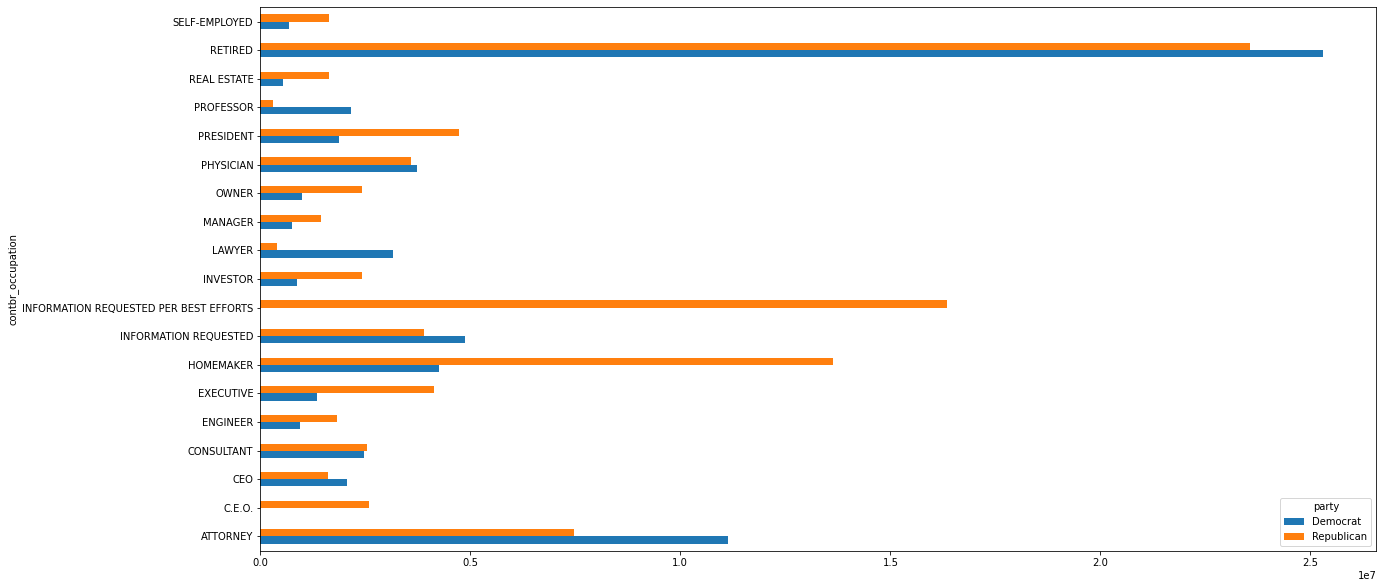

In [59]:
occupation[occupation.sum(1) > 20_00_000].plot(kind= 'barh', figsize= (20, 10))

# 

In [89]:
grouped = data_barack_and_mitt.groupby(['cand_nm'])

In [92]:
def get_nlargest(group):
    group = group.groupby('contbr_occupation').contb_receipt_amt.sum()
    return group.nlargest(5)

In [93]:
grouped.apply(get_nlargest)

cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
Name: contb_receipt_amt, dtype: float64

# 

## Bucketing donation amounts

In [97]:
labels = pd.cut(data_barack_and_mitt.contb_receipt_amt, [0, 1, 10, 50, 100, 1000, 10000,
                                1_00_000, 10_00_000, 10_000_000])
labels

411          (10, 50]
412       (100, 1000]
413       (100, 1000]
414          (10, 50]
415         (50, 100]
             ...     
701381       (10, 50]
701382    (100, 1000]
701383        (1, 10]
701384       (10, 50]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (9, interval[int64]): [(0, 1] < (1, 10] < (10, 50] < (50, 100] ... (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [101]:
data_barack_and_mitt.groupby(['cand_nm', labels]).size().unstack().T

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 50]",247493,17525
"(50, 100]",124787,14328
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


# 

## Donation statastics by state

In [104]:
data_barack_and_mitt.groupby(['cand_nm', 'contbr_st']).contb_receipt_amt.sum().unstack(0).fillna(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AA,56405.00,135.00
AB,2048.00,0.00
AE,42973.75,5680.00
AK,281840.15,86204.24
AL,543123.48,527303.51
...,...,...
WI,1130155.46,270316.32
WV,169154.47,126725.12
WY,194046.74,252595.84


# 

# That's it!
I know, there is not much in the exploration as it should be in the notebooks, but I am trying to get new ideas from the book how to approach to the problems and how to solve.

So that's it!